In [169]:
import pandas
import seaborn
import matplotlib

pandas.options.display.max_columns = None
pandas.options.display.max_colwidth = None
pandas.options.display.max_rows = None

seaborn.set_style("darkgrid")

In [170]:
data = pandas.read_csv(r"C:\Users\Albraa Alsakor\Programming\data-analytics-case-studies\netflix-titles\data\netflix_titles.csv",low_memory=False)
print(data.info())
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


In [171]:
data["date_added"] = data["date_added"].str.strip()
data["date_added"] = pandas.to_datetime(data["date_added"])
data["date_added"].head(5)


0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [172]:
data.loc[:,["type","title"]].groupby("type").count().rename(columns={"title":"titles"})

,titles
type,
Movie,6131
TV Show,2676


<Axes: title={'center': 'TV Shows Over The Years by Seasons'}, xlabel='release_year', ylabel='tv_shows'>

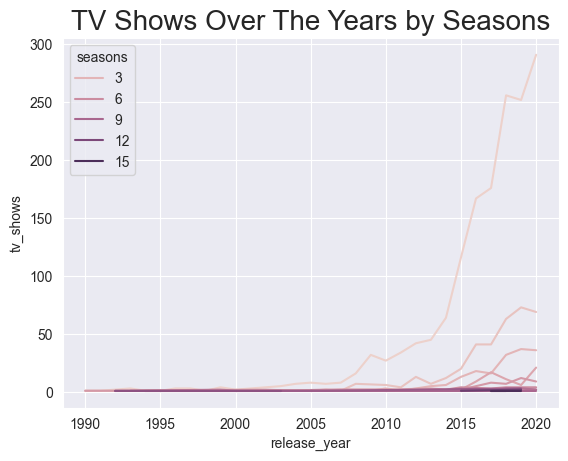

In [173]:

import matplotlib.pyplot


tvShows = data.loc[(data["type"]=="TV Show"),["title","release_year","duration"]].rename(columns={"title":"titles","duration":"seasons"})
tvShows["seasons"] = tvShows["seasons"].str.replace(pat=r"\D",repl="",regex=True)
tvShows["seasons"] = tvShows["seasons"].astype(int)
tvShows["seasons_summary"] = None
tvShows = tvShows.loc[(tvShows["release_year"]>=1990) & (tvShows["release_year"]<=2020),["titles","seasons","release_year"]].rename(columns={"titles":"tv_shows"}).groupby(["release_year","seasons"],as_index=False).count().sort_values(by="release_year")


tvShowsPlot = seaborn.lineplot(tvShows,x="release_year",y="tv_shows",hue="seasons")
tvShowsPlot.set_title("TV Shows Over The Years by Seasons",fontsize=20,loc="center")
tvShowsPlot.set
tvShowsPlot

<Axes: title={'center': 'Movies Over The Years by Duration'}, xlabel='release_year', ylabel='movies'>

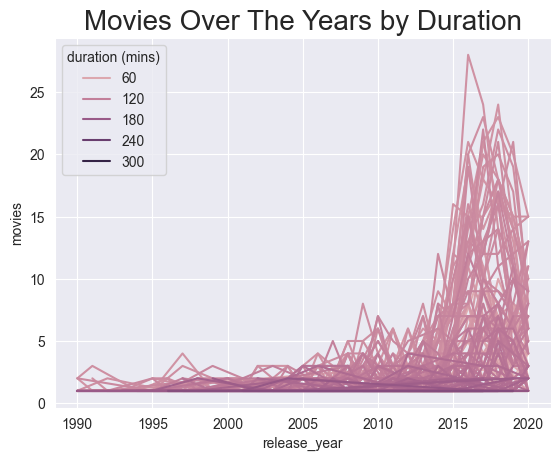

In [174]:
movies = data.loc[(data["type"]=="Movie"),["title","release_year","duration"]].rename(columns={"title":"titles"})
movies["duration"] = movies["duration"].str.replace(pat=r"\D",repl="",regex=True).fillna(0)
movies["duration"] = movies["duration"].astype(int)
movies = movies.loc[(movies["release_year"]>=1990) & (movies["release_year"]<=2020) & (movies["duration"]>0),["titles","release_year","duration"]].rename(columns={"titles":"movies"}).groupby(["release_year","duration"],as_index=False).count()

moviesPlot = seaborn.lineplot(data=movies,x="release_year",y="movies",hue="duration")
moviesPlot.set_title("Movies Over The Years by Duration",fontsize=20,loc="center")
moviesPlot.legend(title="duration (mins)")
moviesPlot

Text(0.5, 1.0, 'Titles Over The Years by Rating')

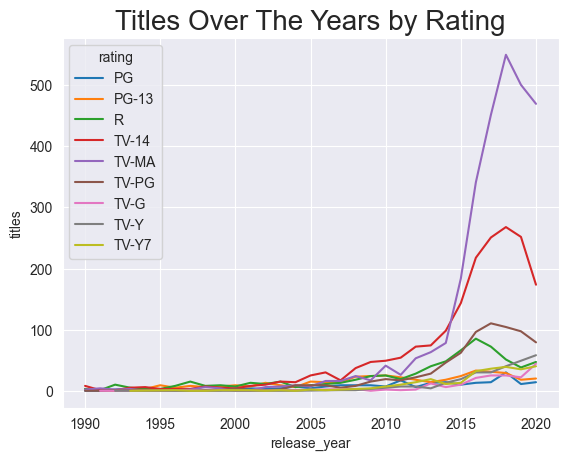

In [175]:
ratings = data.loc[:,["title","release_year","rating","type"]].rename(columns={"title":"titles"})
ratings.drop(ratings.loc[(ratings["rating"].isin(["66 min","74 min","84 min","NC-17","UR","TV-Y7-FV","G","NR"]))].index,inplace=True)
ratings = ratings.loc[(ratings["release_year"]>=1990) & (ratings["release_year"]<=2020),["release_year","rating","titles"]].groupby(["release_year","rating"],as_index=False).count()

ratingsPlot = seaborn.lineplot(data=ratings,x="release_year",y="titles",hue="rating")
ratingsPlot.set_title("Titles Over The Years by Rating",fontsize=20,loc="center")